# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [3]:
import main

import numpy as np
import scipy 
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
 
1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu w pliku main.py generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$. 


In [4]:
random_matrices = []
for n in [10, 20, 50, 100, 1000]:
    A, b = main.random_matrix_Ab(n)
    random_matrices.append((A, b))

***Zadanie 2***   
 
1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*. 

2. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*) sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*. 

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników? 

Zakres wartości i wymiary macierzy mają wpływ na wzrost normy residuum i uwarunkowania macierzy, co obniża jakość otrzymanych wyników.
  

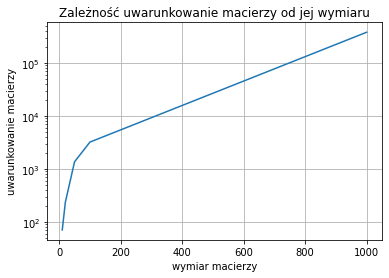

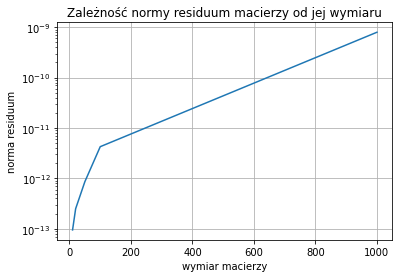

In [47]:
norms = []
conds = []
n = [10, 20, 50, 100, 1000]

for matrices in random_matrices:
    A, b = matrices[0], matrices[1]
    x = np.linalg.solve(A, b)
    norms.append(main.residual_norm(A, x, b))
    conds.append(np.linalg.cond(A))


plt.semilogy(n, conds)
plt.title('Zależność uwarunkowanie macierzy od jej wymiaru')
plt.xlabel('wymiar macierzy')
plt.ylabel('uwarunkowanie macierzy')
plt.grid()
plt.show()

plt.semilogy(n, norms)
plt.title('Zależność normy residuum macierzy od jej wymiaru')
plt.xlabel('wymiar macierzy')
plt.ylabel('norma residuum')
plt.grid()
plt.show()

***Zadanie 3***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod: 

In [4]:
import numpy as np
import numpy.linalg as nplin

A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)
 
print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:
    - wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej,
    - wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych,
    - wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych. 
    
    W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak pokazanow w przykładzie wyżej. 

3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania. 

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy. 

ad 4
Nie - potrzebujemy znać tylko pierwszą i ostatnią wartość z wektora singularnego. 


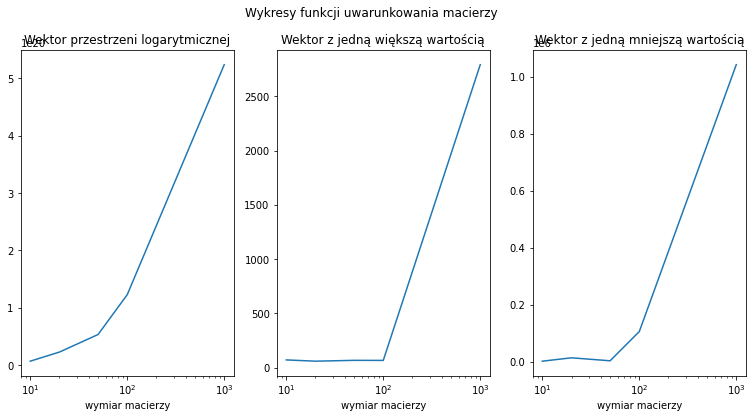

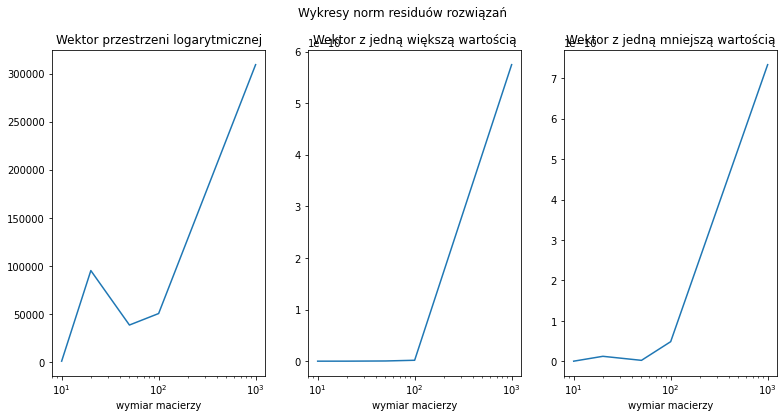

In [44]:
conds = []
norms = []
i = 0
for n in [10, 20, 50, 100, 1000]:
    v1 = main.log_sing_value(min(random_matrices[i][0].shape), 1, 100)
    v2 = main.order_sing_value(min(random_matrices[i][0].shape), 2, 'gre')
    v3 = main.order_sing_value(min(random_matrices[i][0].shape), 2, 'low')
    for vector in [v1, v2, v3]:
        A, b = random_matrices[i]
        A = main.create_matrix_from_A(A, vector)
        x = np.linalg.solve(A, b)
        norms.append(main.residual_norm(A, x, b))
        conds.append(np.linalg.cond(A))
    i += 1

n = [10, 20, 50, 100, 1000]
conds1 = []
conds2 = []
conds3 = []
norms1 = []
norms2 = []
norms3 = []

for i in range(15):
    if i % 3 == 0:
        conds1.append(conds[i])
        norms1.append(norms[i])
    elif (i + 1) % 3 == 0:
        conds2.append(conds[i])
        norms2.append(norms[i])
    else:
        conds3.append(conds[i])
        norms3.append(norms[i]) 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 6))
fig.suptitle('Wykresy funkcji uwarunkowania macierzy')

ax1.semilogx(n, conds1)
ax1.set_title('Wektor przestrzeni logarytmicznej')
ax1.set_xlabel('wymiar macierzy')

ax2.semilogx(n, conds2)
ax2.set_title('Wektor z jedną większą wartością')
ax2.set_xlabel('wymiar macierzy')

ax3.semilogx(n, conds3)
ax3.set_title('Wektor z jedną mniejszą wartością')
ax3.set_xlabel('wymiar macierzy')

plt.show()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 6))
fig.suptitle('Wykresy norm residuów rozwiązań')

ax1.semilogx(n, norms1)
ax1.set_title('Wektor przestrzeni logarytmicznej')
ax1.set_xlabel('wymiar macierzy')

ax2.semilogx(n, norms2)
ax2.set_title('Wektor z jedną większą wartością')
ax2.set_xlabel('wymiar macierzy')

ax3.semilogx(n, norms3)
ax3.set_title('Wektor z jedną mniejszą wartością')
ax3.set_xlabel('wymiar macierzy')

plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)

Wnioski
Zapoznałem się z normą residuum oraz wskaźnikiem uwarunkowania macierzy. Przeanalizowałem wpływ rozmiaru macierzy na wartości obu funkcji. Dowiedziałem się o rozkładzie SVD macierzy i odtworzenia macierzy za pomocą wygenerowanego wektora wartości singularnych.